In [1]:
import pandas as pd 
import os 
import matplotlib

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,x,y
0,1,"1,5"
1,2,"1,9"
2,3,"2,8"
3,4,"4,1"
4,5,"5,3"


c:\ProgramData\anaconda3\lib\site-packages\matplotlib\animation.py:880: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


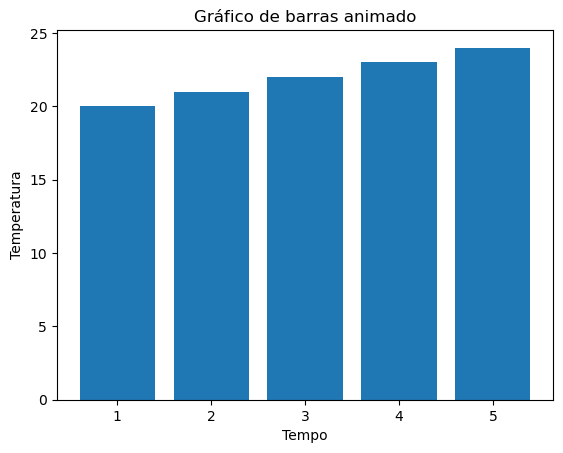

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation

# Crie um dataframe com os dados
df = pd.DataFrame({'Tempo': [1, 2, 3, 4, 5], 'Temperatura': [20, 21, 22, 23, 24]})


def update(i):
    plt.cla()
    plt.bar(df['Tempo'], df['Temperatura'][:i])
    plt.xlabel('Tempo')
    plt.ylabel('Temperatura')
    plt.title('Gráfico de barras animado')


# Crie um gráfico de barras
plt.bar(df['Tempo'], df['Temperatura'])

# Configure o gráfico
plt.xlabel('Tempo')
plt.ylabel('Temperatura')
plt.title('Gráfico de barras animado')

# Crie a animação
ani = FuncAnimation(plt.gcf(), func=update, frames=df.shape[0], interval=1)

# Exiba o gráfico
plt.show()


(0.0, 7.9)

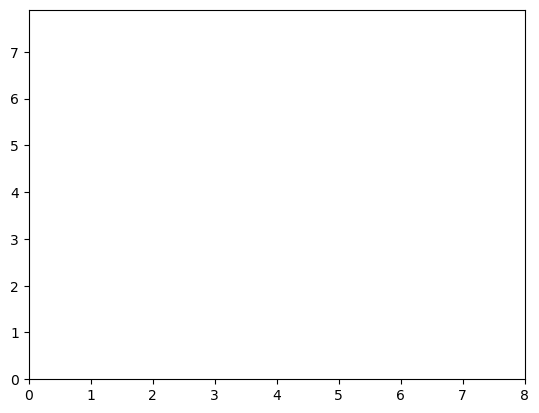

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.animation import FuncAnimation

# DataFrame com os dados fornecidos
data = {
    'x': [1, 2, 3, 4, 5, 6, 7],
    'y': ["1,5", "1,9", "2,8", "4,1", "5,3", "5,9", "6,9"]
}
df = pd.DataFrame(data)

# Converter a coluna 'y' para valores numéricos corretamente
df['y'] = df['y'].str.replace(',', '.').astype(float)

# Função para ajustar a curva de regressão multinomial
def multinomial_regression(x, a, b, c):
    return a * x**2 + b * x + c

# Criar a figura e o eixo do gráfico
fig, ax = plt.subplots()
scatter = ax.scatter([], [], c='b')
line, = ax.plot([], [], 'r-')
# Definir limites dos eixos
ax.set_xlim(0, df['x'].max() + 1)
ax.set_ylim(0, df['y'].max() + 1)
# Função de inicialização da animação

In [31]:
x = df['x'].iloc[:1]
y = df['y'].iloc[:1]

In [44]:
frame=1
x = df['x'].iloc[:frame][0]
y = df['y'].iloc[:frame][0]
print(x)
print(y)
# Realizar a regressão para ajustar a curva aos dados
popt, _ = curve_fit(multinomial_regression, x, y)


# Calcular os pontos da curva de regressão para o frame atual
x_fit = range(1, df['x'].max() + 1)
y_fit = multinomial_regression(x_fit, *popt)

scatter.set_offsets(list(zip(x, y)))
line.set_data(x_fit, y_fit)

1
1.5


TypeError: Improper input: func input vector length N=3 must not exceed func output vector length M=1

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

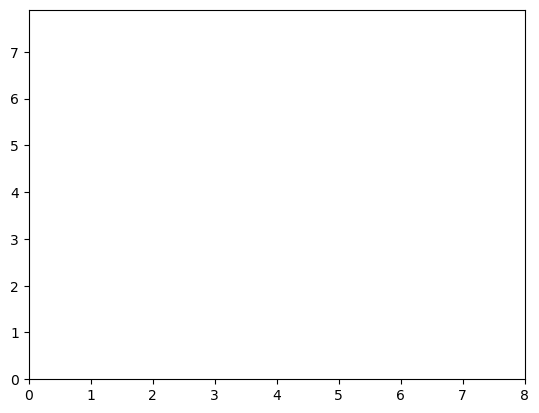

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.animation import FuncAnimation

# Dados fornecidos como dois arrays separados
x = np.array([1, 2, 3, 4, 5, 6, 7])
y_str = np.array(["1,5", "1,9", "2,8", "4,1", "5,3", "5,9", "6,9"])

# Converter os valores de 'y' para valores numéricos corretamente
y = np.array([float(value.replace(',', '.')) for value in y_str])

# Função para ajustar a curva de regressão polinomial (grau 1) aos dados
def linear_regression(x, a, b):
    return a * x + b

# Criar a figura e o eixo do gráfico
fig, ax = plt.subplots()
scatter = ax.scatter([], [], c='b')
line, = ax.plot([], [], 'r-')

# Definir limites dos eixos
ax.set_xlim(0, x.max() + 1)
ax.set_ylim(0, y.max() + 1)

# Função de inicialização da animação
def init():
    scatter.set_offsets([])
    line.set_data([], [])
    return scatter, line

# Função para atualizar a animação em cada frame
def update(frame):
    x_data = x[:frame]
    y_data = y[:frame]

    # Realizar a regressão para ajustar a curva aos dados
    popt, _ = curve_fit(linear_regression, x_data, y_data)

    # Calcular os pontos da curva de regressão para o frame atual
    x_fit = np.linspace(1, x.max(), 100)
    y_fit = linear_regression(x_fit, *popt)

    scatter.set_offsets(list(zip(x_data, y_data)))
    line.set_data(x_fit, y_fit)
    return scatter, line

# Criar a animação
animation = FuncAnimation(fig, update, frames=len(x), init_func=init, blit=True)

# Mostrar a animação
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste de Curva de Regressão Polinomial (Grau 1)')
plt.show()


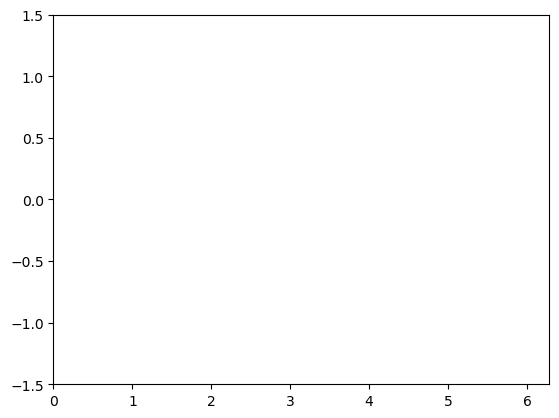

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create the figure and axes
fig, ax = plt.subplots()

# Set the limits of the plot
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.5, 1.5)

# Initialize the plot elements
line, = ax.plot([], [], lw=2)

# Function to initialize the animation
def init():
    line.set_data([], [])
    return line,

# Function to update the plot in each frame
def update(frame):
    x = np.linspace(0, 2*np.pi, 100)
    y = np.sin(x + frame/10)  # Varying phase for animation effect
    line.set_data(x, y)
    return line,

# Create the animation object
ani = FuncAnimation(fig, update, frames=100, init_func=init, blit=True)

# Display the animation
plt.show()
ani.save('anima.mp4')

c:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


[3.74540119] [9.22926896]
[3.74540119 9.50714306] [ 9.22926896 20.18565441]
[3.74540119 9.50714306 7.31993942] [ 9.22926896 20.18565441 15.52423055]
[3.74540119 9.50714306 7.31993942 5.98658484] [ 9.22926896 20.18565441 15.52423055 12.67206599]
[3.74540119 9.50714306 7.31993942 5.98658484 1.5601864 ] [ 9.22926896 20.18565441 15.52423055 12.67206599  2.64185082]


KeyboardInterrupt: 

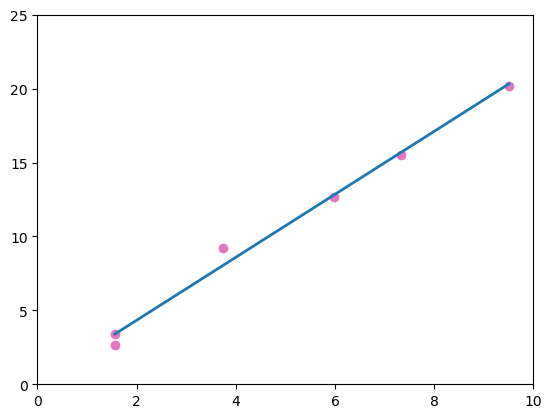

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Generate random data for x and y
np.random.seed(42)
x_data = np.random.rand(50) * 10
y_data = 2 * x_data + 1 + np.random.randn(50)  # y = 2x + 1 with Gaussian noise

# Create the figure and axes
fig, ax = plt.subplots()

# Set the limits of the axes
ax.set_xlim(0, 10)
ax.set_ylim(0, 25)

# Initialize the scatter plot and line plot
scatter = ax.scatter([], [])
line, = ax.plot([], [], lw=2)

# Function to initialize the animation
def init():
    scatter.set_offsets([])
    line.set_data([], [])
    return scatter, line
import time 

# Function to update the plot in each frame
def update(frame):
    x = x_data[:frame]
    y = y_data[:frame]
    print(x,y)
    # Adjust the regression line using polyfit (degree 1)
    coeffs = np.polyfit(x, y, 1)
    line_x = np.array([x.min(), x.max()])
    line_y = np.polyval(coeffs, line_x)

    # Clear and re-create the scatter plot
    scatter.remove()
    scatter = ax.scatter(x, y)

    line.set_data(line_x, line_y)
    return scatter, line


frami = range(1, len(x_data) + 1)
# Create the animation object

for i in frami:
    
    x = x_data[:i]
    y = y_data[:i]
    coeffs = np.polyfit(x, y, 1)
    line_x = np.array([x.min(), x.max()])
    line_y = np.polyval(coeffs, line_x)

    scatter.remove()
    scatter = ax.scatter(x, y)
    line.set_data(line_x, line_y)

    time.sleep(1)
    print(x,y)
    scatter



#ani = FuncAnimation(fig, update, frames=frami, init_func=init, blit=True)

# Display the animation


In [59]:
range(1, len(x_data) + 1)

range(1, 51)